In [1]:
import os

os.path.isfile('../Assets/Iowa_Liquor_sample.csv') 

True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Import, convert 'Date' col to datetime
lq = pd.read_csv('../Assets/Iowa_Liquor_sample.csv',parse_dates=['Date'],infer_datetime_format=True)

In [4]:
# format column names
import re

lq.columns = [re.sub("[^a-zA-Z]+", "", x) for x in lq.columns]

In [5]:
# remove '$' in values and convert to numeric
adjust_cols = ['StateBottleCost','StateBottleRetail','SaleDollars']

for col in adjust_cols:
    lq[col] = pd.to_numeric(lq[col].str.replace('$',''),errors='coerce')

In [6]:
lq.head(1)

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38


In [7]:
lq.groupby('StoreNumber').SaleDollars.sum()

StoreNumber
2106    176849.97
2113     11376.12
2130    139727.54
2152      9097.51
2178     29912.68
2190    156204.75
2191    172431.69
2200     26986.42
2205     24681.39
2228     20548.45
2233     36075.99
2238     15960.22
2248     82206.24
2285     89507.80
2290     69361.36
2327     12441.71
2353     59236.41
2367      5010.83
2413    113420.05
2445      8612.85
2448     24478.88
2459      9177.02
2460     40727.62
2465     31215.56
2475     15471.14
2478     24303.27
2487     28900.96
2498      3040.01
2500    182957.82
2501    174814.20
          ...    
5211      1210.13
5212      1283.38
5213       642.38
5214      1652.94
5215      2263.08
5216       159.48
5217       469.62
5218        19.20
5220      1516.17
5222      9948.72
5223       327.18
5224      2595.98
5225       745.65
5226      1746.09
5227      1717.53
5229       510.66
5230      3441.31
5232       186.69
5233       284.85
5234       525.00
5236      4257.62
5237      1341.93
5240       477.60
5247       278.0

In [10]:
# liquor = liquor.dropna()
# liquor.isnull().sum()

# remove spaces
lq = lq.dropna(how = 'any')

In [11]:
lq[('Category')] = lq[('Category')].astype(int)

In [ ]:
# Calculate the sum of sales for each store in 2015 by grouping the full year data
# hint: what columns do you need? what is your aggregating function? 

In [16]:
# new df lq2015_date

################ 1st instance of df

lq2015_date = lq[(lq['Date'] > '2015-01-01') & (lq['Date'] < '2016-01-01')]

In [17]:
# new df lq2015_fy

################ 1st instance of df

lq2015_fy = lq2015_date.groupby('StoreNumber').agg({'SaleDollars':sum})

In [18]:
# new df lq2015_q1

################ 1st instance of df

lq2015_q1 = lq[(lq['Date'] > '2015-01-03') & (lq['Date'] < '2015-04-01')]

In [21]:
# Remove columns that will not be used in the model

# new df "lq2015_q1_drop"

################ 1st instance of df

lq2015_q1_drop = lq2015_q1.drop(['City', 'ZipCode', 'CountyNumber', 'County','CategoryName', 'VendorNumber','ItemDescription'], axis=1)

In [22]:
# Add calculated measures
lq2015_q1_drop['Sold_div_Sales'] = ((lq2015_q1_drop.SaleDollars / lq2015_q1_drop.BottlesSold))
lq2015_q1_drop['Sale_Profit'] = ((lq2015_q1_drop.StateBottleRetail - lq2015_q1_drop.StateBottleCost))

#lq2015_fy['SaleDollars_sum'] = lq2015_fy['SaleDollars'].sum()

lq2015_q1_drop['BottleVolumeml_mean'] = lq2015_q1_drop['BottleVolumeml']
lq2015_q1_drop['SaleProfit_median'] = lq2015_q1_drop['Sale_Profit']
lq2015_q1_drop['SaleProfit_mean'] = lq2015_q1_drop['Sale_Profit']
lq2015_q1_drop['SaleProfit_sum'] = lq2015_q1_drop['Sale_Profit']
lq2015_q1_drop['StateBottleCost_mean'] = lq2015_q1_drop['StateBottleCost']
lq2015_q1_drop['StateBottleCost_sum'] = lq2015_q1_drop['StateBottleCost']
lq2015_q1_drop['SaleDollars_mean'] = lq2015_q1_drop['SaleDollars']
lq2015_q1_drop['SaleDollars_sum_q1'] = lq2015_q1_drop['SaleDollars']

In [23]:
lq2015_q1_drop.head(1)

,Date,StoreNumber,Category,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,...,Sold_div_Sales,Sale_Profit,BottleVolumeml_mean,SaleProfit_median,SaleProfit_mean,SaleProfit_sum,StateBottleCost_mean,StateBottleCost_sum,SaleDollars_mean,SaleDollars_sum_q1
12,2015-01-22,3858,1012100,15248,1750,8.92,13.38,1,13.38,1.75,...,13.38,4.46,1750,4.46,4.46,4.46,8.92,8.92,13.38,13.38


In [25]:
# Create new df "features"

################ 1st instance of df

lq2015_q1_features = lq2015_q1_drop.groupby('StoreNumber').agg({'SaleDollars_mean':'mean','SaleDollars_sum_q1':sum,'StateBottleCost_mean':'mean','StateBottleCost_sum':sum,'SaleProfit_median':'median','SaleProfit_mean':'mean','BottleVolumeml_mean':'mean',}) [['SaleDollars_mean','SaleDollars_sum_q1','StateBottleCost_mean','StateBottleCost_sum','SaleProfit_median','SaleProfit_mean','BottleVolumeml_mean',]]   

In [26]:
# Merge > lq2015_fy / lq2015_q1_features

In [33]:
# Merge, new df "combined"

################ 1st instance of df

lq2015_combined = pd.merge(lq2015_q1_features, lq2015_fy, right_index=True, left_index=True)

In [39]:
from sklearn.model_selection import train_test_split

In [280]:
# Training setup
training_data,holdout = train_test_split(lq2015_combined,test_size=0.10,random_state=123)

In [42]:
# Features List
# select your feature column names
feature_cols = ['SaleDollars_mean', 'StateBottleCost_mean', 'StateBottleCost_sum', 'SaleProfit_median', 'SaleProfit_mean', 'BottleVolumeml_mean']

In [259]:
# Training features
# define your X (features) and y (target)
# hint - make sure your y is not in your X!
X = lq2015_combined[feature_cols]
y = lq2015_combined.SaleDollars_sum_q1

In [199]:
lq2015_combined[feature_cols]

,SaleDollars_mean,StateBottleCost_mean,StateBottleCost_sum,SaleProfit_median,SaleProfit_mean,BottleVolumeml_mean
StoreNumber,,,,,,
2106,304.552636,10.041550,1295.36,4.000,5.033721,886.434109
2113,67.458333,10.546190,442.94,4.315,5.275000,854.166667
2130,278.995057,10.260460,892.66,4.630,5.140920,955.747126
2152,62.608125,9.624062,307.97,4.000,4.836875,1093.750000
2178,122.008542,9.816458,471.19,4.665,4.932083,985.937500
2190,84.878732,10.908242,3785.16,3.960,5.468040,809.654179
2191,192.619669,11.626424,1755.59,4.750,5.827550,1024.668874
2200,58.338452,11.716310,984.17,4.875,5.879048,1127.380952
2205,91.539143,10.629000,744.03,4.310,5.324000,878.214286


In [260]:
lr_model.predict(X)

array([ 24365.26294704,   3059.34255475,  17569.07063719, ...,
         8544.69247965,  12342.49962381,  11007.52776897])

In [104]:
# CV setup
# from sklearn.cross_validation import KFold
from sklearn.cross_validation import KFold

In [239]:
# KFold setup
# Number of rows in your dataframe
# Number of folds you wish to trial
n = training_data.shape[0]
kf = KFold(X.shape[0],n_folds=6,random_state=1)

In [106]:
# Import Model and Score tests
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
# RMSE
from math import sqrt
rms = sqrt(mean_squared_error(y_true,y_preds))

In [107]:
# Create model
lr_model = LinearRegression()

In [240]:
# Model training run
# for train,test in kf:
# Set up your training and testing sets
# Create a blank list to store fold scores

MAE_score = []
MSE_score = []
R2_scores = []
RMSE_score = []

# Use K-Folds cross validation to train your model / kfolds loop (define scores in the loop)
# Fill-in the kfolds-loop:
# use iloc with scikit

for train_index, test_index in kf:
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_true = y.iloc[train_index], y.iloc[test_index] 
    
    # Fit your model on your training x and training y
    lr_model.fit(x_train,y_train)
    y_preds = lr_model.predict(x_test)
    
    fold_score1 = mean_squared_error(y_true,y_preds)
    MSE_score.append(fold_score1)
    
    fold_score2 = mean_absolute_error(y_true,y_preds)
    MAE_score.append(fold_score2)
    
    fold_score3 = r2_score(y_true,y_preds)
    R2_scores.append(fold_score3)
    
    fold_score4 = sqrt(mean_squared_error(y_true,y_preds))
    RMSE_score.append(fold_score4)

In [69]:
# Scores print out

In [70]:
y_preds

array([  7.04324096e+02,   3.80920203e+03,   7.64600173e+03,
         7.51240352e+03,  -6.74500203e+02,   5.21154543e+03,
         5.21817565e+02,   7.24999599e+02,   8.41176554e+02,
        -2.55958551e+03,   8.93041603e+02,   7.53287336e+02,
         1.91066109e+02,   1.26359601e+03,   1.12911413e+03,
         2.65685920e+02,   6.23532893e+03,   3.97024052e+03,
         3.55668495e+01,   5.85778176e+02,  -3.33179888e+02,
         3.62713637e+03,   1.25845181e+03,  -1.02513526e+03,
         2.35087357e+03,   4.54375995e+03,   1.07679083e+01,
         3.49213557e+02,  -1.34878047e+03,   1.44167564e+03,
        -8.63112728e+02,   5.87633593e+02,   4.40044840e+03,
        -1.10406514e+03,  -7.34575680e+02,   1.33117119e+03,
        -2.65774252e+03,  -1.61873998e+03,  -9.68546071e+02,
        -1.37724894e+03,  -9.80783501e+02,  -2.50091740e+03,
        -4.49786194e+02,  -2.03069914e+03,  -3.14464988e+03,
        -2.12968968e+03,   2.11786946e+03,   8.50802196e+02,
         1.51764996e+03,

In [71]:
MSE_score

[150132513.64797401,
 30678873.709694393,
 6590550.7686200459,
 6052083.8383651348,
 69138619.275375664,
 6202008.8531953907]

In [72]:
MAE_score

[6660.9464899244631,
 2069.1286261567648,
 1448.1838965798165,
 1560.7826235228379,
 1840.6070025803854,
 1667.9079439440509]

In [73]:
RMSE_score

[12252.857366670602,
 5538.851298752693,
 2567.206802854037,
 2460.0983391655577,
 8314.963576310822,
 2490.383274356658]

In [74]:
R2_scores

[0.60402633921700177,
 0.63347351549374875,
 0.61027244519988688,
 -1.5251645435661261,
 0.64973058162059272,
 0.082172669897239592]

In [78]:
lr_model.score(X, y)

0.73607629204281844

In [79]:
list(zip(feature_cols,lr_model.coef_))

[('SaleDollars_mean', 41.703175871226655),
 ('StateBottleCost_mean', 3158.0758160217215),
 ('StateBottleCost_sum', 15.813886477843296),
 ('SaleProfit_median', -82.38511307234738),
 ('SaleProfit_mean', -7423.6168319965609),
 ('BottleVolumeml_mean', 0.87546002293529346)]

In [80]:
lr_model.intercept_

-1562.7381962685076

In [82]:
list(lr_model.predict(x_test)[0:5])

[704.32409595067111,
 3809.2020329422767,
 7646.0017279878439,
 7512.4035172979065,
 -674.50020289512088]

In [83]:
list(lr_model.predict(X)[0:5])

[26412.809100477843,
 2793.4787311245118,
 18883.03401414914,
 1032.8283868199192,
 5842.7957693654907]

In [114]:
y_true.shape

(210L,)

In [113]:
X.shape

(1261, 6)

In [112]:
x_test.shape

(210, 6)

In [110]:
lq2015_combined.shape

(1261, 8)

In [122]:
((y_true - lr_model.predict(x_test)) **2).sum()

1302421859.1710322

In [ ]:
# Calculate your residuals (prediction - actual)
lq2015_combined_residuals = y_preds - y_true
lq2015_combined_residuals

In [118]:
lq2015_combined_residuals.mean()

-722.8462867567971

(array([   3.,   31.,  118.,   39.,   12.,    3.,    2.,    0.,    1.,    1.]),
 array([ -8956.60979885,  -5257.35789167,  -1558.10598448,   2141.14592271,
          5840.39782989,   9539.64973708,  13238.90164427,  16938.15355145,
         20637.40545864,  24336.65736583,  28035.90927301]),
 <a list of 10 Patch objects>)

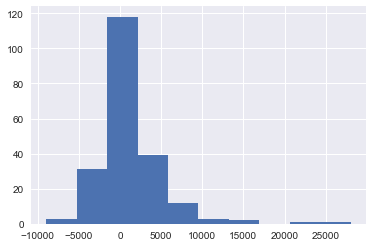

In [241]:
plt.figure()
plt.hist(y_preds)

In [ ]:

# Holdout Testing

In [272]:
# Training setup
training_data = holdout

In [286]:
# Final features list
X = holdout[feature_cols]
y = holdout.SaleDollars_sum_q1

In [285]:
holdout.head(1)

,SaleDollars_mean,SaleDollars_sum_q1,StateBottleCost_mean,StateBottleCost_sum,SaleProfit_median,SaleProfit_mean,BottleVolumeml_mean,SaleDollars
StoreNumber,,,,,,,,
4663,81.51,326.04,5.4225,21.69,2.5,2.715,812.5,3756.12


In [291]:
X

,SaleDollars_mean,StateBottleCost_mean,StateBottleCost_sum,SaleProfit_median,SaleProfit_mean,BottleVolumeml_mean
StoreNumber,,,,,,
4663,81.510000,5.422500,21.69,2.500,2.715000,812.500000
3908,120.838750,8.584167,412.04,3.840,4.315625,1218.750000
4669,120.767586,17.039655,494.15,5.550,8.522069,376.724138
4204,100.807500,7.717000,154.34,3.805,3.860500,1050.000000
4967,18.043276,7.591552,440.31,3.255,3.804310,769.396552
4930,178.560000,9.633333,28.90,5.230,4.946667,1416.666667
4801,127.228571,9.519524,199.91,4.830,4.761429,1238.095238
3690,102.402727,8.435455,185.58,4.130,4.219545,880.681818
4392,73.683684,7.263158,138.00,3.740,3.654211,626.315789


In [293]:
y

StoreNumber
4663      326.04
3908     5800.26
4669     3502.26
4204     2016.15
4967     1046.51
4930      535.68
4801     2671.80
3690     2252.86
4392     1399.99
4081     1742.96
4440     1012.41
4811      157.06
4046      530.33
4660     3123.12
4837     1614.21
4717      284.01
4360     1199.39
2850     1139.62
4736      868.68
4125     1558.20
4491      887.16
4790      186.18
3876     1181.42
4279      328.77
3591      803.64
4362     1162.04
4896       60.12
2285    10019.12
4709     1079.16
4420      313.22
          ...   
5001     2457.92
4102     2645.43
2584     9003.97
4016      775.66
4764     3496.43
4475     1799.39
4406     1057.13
3783    10062.43
4306     2100.64
3654     2312.42
2806    10736.99
4711      909.24
3587      996.36
4428     1974.00
2652    11343.72
4630     3682.10
3721    12345.42
4183     3483.04
3773    48574.94
4426     6566.60
4756      167.88
4312    31475.35
2582    11165.02
2648    44321.35
3582      162.60
4246     1035.76
3926    21966.77
36

In [290]:
lr_model.predict(X)

array([ -1.46948099e+02,   5.87734637e+03,   6.18903622e+03,
         2.53541499e+03,  -8.21641948e+01,   5.05614010e+02,
         4.66776373e+03,   3.02824574e+03,  -1.51123633e+02,
        -1.05848296e+02,   1.34745260e+03,  -9.39666321e+02,
        -2.83695987e+03,   5.70511400e+03,   5.03515840e+03,
        -2.31796205e+03,   1.48065155e+03,  -2.11490062e+03,
         9.22205536e+03,   2.80584353e+01,   1.31186226e+03,
        -3.98650154e+03,  -9.30518236e+02,  -2.05202243e+03,
        -4.36088092e+02,  -1.15438418e+03,  -1.31411046e+03,
         1.43013475e+04,   3.49894879e+03,  -2.41306428e+03,
         2.13049791e+03,  -1.56751051e+03,   2.88558233e+03,
         1.84206555e+04,  -1.45800806e+03,   1.03515410e+04,
        -1.23668167e+03,   4.62988674e+03,  -1.19526611e+03,
         6.07997364e+03,   3.36479063e+03,   6.00804450e+03,
         1.12222408e+04,   1.84694718e+03,   2.66637097e+04,
         1.35372738e+04,   4.90636185e+03,   5.81775236e+03,
         5.63917469e+02,

In [274]:
# Set Holdout data for testing
n = holdout.shape[0]
kf = KFold(X.shape[0],n_folds=6,random_state=1)

In [270]:
holdout

,SaleDollars_mean,SaleDollars_sum_q1,StateBottleCost_mean,StateBottleCost_sum,SaleProfit_median,SaleProfit_mean,BottleVolumeml_mean,SaleDollars
StoreNumber,,,,,,,,
4663,81.510000,326.04,5.422500,21.69,2.500,2.715000,812.500000,3756.12
3908,120.838750,5800.26,8.584167,412.04,3.840,4.315625,1218.750000,18547.20
4669,120.767586,3502.26,17.039655,494.15,5.550,8.522069,376.724138,9427.17
4204,100.807500,2016.15,7.717000,154.34,3.805,3.860500,1050.000000,8261.24
4967,18.043276,1046.51,7.591552,440.31,3.255,3.804310,769.396552,8644.12
4930,178.560000,535.68,9.633333,28.90,5.230,4.946667,1416.666667,2837.16
4801,127.228571,2671.80,9.519524,199.91,4.830,4.761429,1238.095238,9994.05
3690,102.402727,2252.86,8.435455,185.58,4.130,4.219545,880.681818,14908.31
4392,73.683684,1399.99,7.263158,138.00,3.740,3.654211,626.315789,6300.54


In [275]:
# Train Holdout Data

MAE_score = []
MSE_score = []
R2_scores = []
RMSE_score = []

# Use K-Folds cross validation to train your model / kfolds loop (define scores in the loop)
# Fill-in the kfolds-loop:
# use iloc with scikit

for train_index, test_index in kf:
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_true = y.iloc[train_index], y.iloc[test_index] 
    
    # Fit your model on your training x and training y
    lr_model.fit(x_train,y_train)
    y_preds = lr_model.predict(x_test)
    
    fold_score1 = mean_squared_error(y_true,y_preds)
    MSE_score.append(fold_score1)
    
    fold_score2 = mean_absolute_error(y_true,y_preds)
    MAE_score.append(fold_score2)
    
    fold_score3 = r2_score(y_true,y_preds)
    R2_scores.append(fold_score3)
    
    fold_score4 = sqrt(mean_squared_error(y_true,y_preds))
    RMSE_score.append(fold_score4)

In [276]:
x_train.shape

(106, 6)

In [170]:
y_preds

array([  5336.89085668,  11416.43556943,   9726.3941748 ,   5570.40938375,
         5349.73980102,  11310.17857228,   2574.94844966,  13241.95523727,
         4204.43709387,  46793.27148341,   6450.47588076,   -447.22826289,
        28163.43925799,  11639.28241522,  45390.17564262,   -164.65609761,
        -1730.72857102,  18395.86410944,  -4110.43399705,  -1217.96607895,
         1732.8428291 ])

In [171]:
MSE_score

[8699368.7284421697,
 5789794.4627669835,
 11033639.480901489,
 32738924.117447451,
 79782545.713738456,
 9230388.3868026361]

In [172]:
R2_scores

[-4.1602214202411263,
 0.67979438051245211,
 0.76570546132954287,
 0.17122612579836272,
 0.74740871362820072,
 0.95318807328841759]

In [173]:
list(lr_model.predict(x_test)[0:5])

[5336.8908566814835,
 11416.435569430356,
 9726.3941747975587,
 5570.4093837478968,
 5349.739801020246]

In [174]:
list(zip(feature_cols,lr_model.coef_))

[('SaleDollars_mean', 71.703816401901747),
 ('StateBottleCost_mean', 21849.091294465979),
 ('StateBottleCost_sum', 12.537877781779017),
 ('SaleProfit_median', 340.07937234109056),
 ('SaleProfit_mean', -44346.713436030732),
 ('BottleVolumeml_mean', -0.59736468779826779)]

In [175]:
((y_true - lr_model.predict(x_test)) **2).sum()

193838156.1228554

In [178]:
# Calculate your residuals (prediction - actual)
holdout_residuals = y_preds - y_true
holdout_residuals

StoreNumber
3654    3024.470857
2806     679.445569
4711    8817.154175
3587    4574.049384
4428    3375.739801
2652     -33.541428
4630   -1107.151550
3721     896.535237
4183     721.397094
3773   -1781.668517
4426    -116.124119
4756    -615.108263
4312   -3311.910742
2582     474.262415
2648    1068.825643
3582    -327.256098
4246   -2766.488571
3926   -3570.905891
3676   -5049.253997
3465   -3081.396079
3056    -462.697171
Name: SaleDollars_sum_q1, dtype: float64

In [179]:
holdout_residuals.mean()

67.06560713205441

(array([ 5.,  6.,  2.,  4.,  1.,  0.,  1.,  0.,  0.,  2.]),
 array([ -4110.43399705,    979.936551  ,   6070.30709904,  11160.67764709,
         16251.04819514,  21341.41874318,  26431.78929123,  31522.15983927,
         36612.53038732,  41702.90093537,  46793.27148341]),
 <a list of 10 Patch objects>)

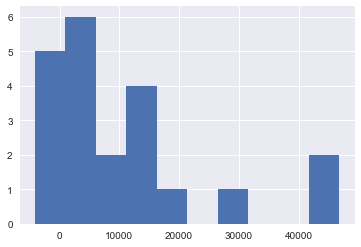

In [246]:
plt.figure()
plt.hist(y_preds)

In [181]:
lq2 = pd.read_csv('../Assets/Iowa_Liquor_sample.csv',parse_dates=['Date'],infer_datetime_format=True)

In [183]:
# format column names
import re
lq2.columns = [re.sub("[^a-zA-Z]+", "", x) for x in lq.columns]

In [185]:
# remove '$' in values and convert to numeric
adjust_cols = ['StateBottleCost','StateBottleRetail','SaleDollars']
for col in adjust_cols:
    lq2[col] = pd.to_numeric(lq2[col].str.replace('$',''),errors='coerce')

In [186]:
lq2 = lq2.dropna(how = 'any')

In [190]:
lq2_2016_q1 = lq2[(lq2['Date'] > '2016-01-03') & (lq2['Date'] < '2016-04-01')]

In [191]:
lq2_2016_q1_drop = lq2_2016_q1.drop(['City', 'ZipCode', 'CountyNumber', 'County','CategoryName', 'VendorNumber','ItemDescription'], axis=1)

In [193]:
lq2_2016_q1_drop.head(1)

,Date,StoreNumber,Category,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
1,2016-03-02,2614,1011100.0,27605,750,13.75,20.63,2,41.26,1.5,0.4


In [195]:
# Add calculated measures
lq2_2016_q1_drop['Sold_div_Sales'] = ((lq2_2016_q1_drop.SaleDollars / lq2_2016_q1_drop.BottlesSold))
lq2_2016_q1_drop['Sale_Profit'] = ((lq2_2016_q1_drop.StateBottleRetail - lq2_2016_q1_drop.StateBottleCost))

#lq2015_fy['SaleDollars_sum'] = lq2015_fy['SaleDollars'].sum()

lq2_2016_q1_drop['BottleVolumeml_mean'] = lq2_2016_q1_drop['BottleVolumeml']
lq2_2016_q1_drop['SaleProfit_median'] = lq2_2016_q1_drop['Sale_Profit']
lq2_2016_q1_drop['SaleProfit_mean'] = lq2_2016_q1_drop['Sale_Profit']
lq2_2016_q1_drop['SaleProfit_sum'] = lq2_2016_q1_drop['Sale_Profit']
lq2_2016_q1_drop['StateBottleCost_mean'] = lq2_2016_q1_drop['StateBottleCost']
lq2_2016_q1_drop['StateBottleCost_sum'] = lq2_2016_q1_drop['StateBottleCost']
lq2_2016_q1_drop['SaleDollars_mean'] = lq2_2016_q1_drop['SaleDollars']
lq2_2016_q1_drop['SaleDollars_sum_q1'] = lq2_2016_q1_drop['SaleDollars']

In [196]:
lq2_2016_q1_drop.head(1)

,Date,StoreNumber,Category,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,...,Sold_div_Sales,Sale_Profit,BottleVolumeml_mean,SaleProfit_median,SaleProfit_mean,SaleProfit_sum,StateBottleCost_mean,StateBottleCost_sum,SaleDollars_mean,SaleDollars_sum_q1
1,2016-03-02,2614,1011100.0,27605,750,13.75,20.63,2,41.26,1.5,...,20.63,6.88,750,6.88,6.88,6.88,13.75,13.75,41.26,41.26


In [201]:
lq2_2016_q1_features = lq2_2016_q1_drop.groupby('StoreNumber').agg({'SaleDollars_mean':'mean','SaleDollars_sum_q1':sum,'StateBottleCost_mean':'mean','StateBottleCost_sum':sum,'SaleProfit_median':'median','SaleProfit_mean':'mean','BottleVolumeml_mean':'mean',}) [['SaleDollars_mean','SaleDollars_sum_q1','StateBottleCost_mean','StateBottleCost_sum','SaleProfit_median','SaleProfit_mean','BottleVolumeml_mean',]]   

In [202]:
lq2_2016_q1_features.head(1)

,SaleDollars_mean,SaleDollars_sum_q1,StateBottleCost_mean,StateBottleCost_sum,SaleProfit_median,SaleProfit_mean,BottleVolumeml_mean
StoreNumber,,,,,,,
2106,241.894841,30478.75,10.363413,1305.79,4.495,5.196508,936.507937


In [203]:
# Not needed, same as feature_cols (original set)
feature_cols2 = ['SaleDollars_mean', 'StateBottleCost_mean', 'StateBottleCost_sum', 'SaleProfit_median', 'SaleProfit_mean', 'BottleVolumeml_mean']

In [204]:
# Not needed, same as feature_cols (original set)
feature_cols2

['SaleDollars_mean',
 'StateBottleCost_mean',
 'StateBottleCost_sum',
 'SaleProfit_median',
 'SaleProfit_mean',
 'BottleVolumeml_mean']

In [ ]:
# Test model against 2016 Q1

In [255]:
X = lq2_2016_q1_features[feature_cols2]
y = lq2_2016_q1_features.SaleDollars_sum_q1

In [258]:
lr_model.predict(X)

array([ 22610.06368224,   1786.01288056,  21509.87612067, ...,
          868.66266138,   2366.99223067,  12784.54295896])